In [2]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Dafault Gpu Device: {}".format(tf.test.gpu_device_name()))

else:
    print("install gpu version of tf")

Dafault Gpu Device: /device:GPU:0


In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [31]:
IMAGE_SIZE = [224, 224]

train_path = r'C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set'
valid_path = r'C:/Users/prakh/Desktop/Cats and dog dataset/test_set/test_set'

In [13]:
# add preprocessing layer to the front of VGG
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 5s 0us/step


In [14]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [22]:
# useful for getting number of classes
folders = glob('C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set/*')

In [23]:
folders

['C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set\\cats',
 'C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set\\dogs']

In [24]:
x = Flatten()(vgg16.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [32]:
training_set = train_datagen.flow_from_directory(train_path ,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [33]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [34]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
251/251 [==============================] - 102s 408ms/step - loss: 0.3206 - accuracy: 0.8642 - val_loss: 0.2165 - val_accuracy: 0.9105
Epoch 2/5
251/251 [==============================] - 102s 405ms/step - loss: 0.2008 - accuracy: 0.9181 - val_loss: 0.2589 - val_accuracy: 0.9041
Epoch 3/5
251/251 [==============================] - 101s 403ms/step - loss: 0.2149 - accuracy: 0.9171 - val_loss: 0.2167 - val_accuracy: 0.9209
Epoch 4/5
251/251 [==============================] - 101s 402ms/step - loss: 0.1620 - accuracy: 0.9357 - val_loss: 0.3120 - val_accuracy: 0.8917
Epoch 5/5
251/251 [==============================] - 102s 408ms/step - loss: 0.1653 - accuracy: 0.9350 - val_loss: 0.2154 - val_accuracy: 0.9263


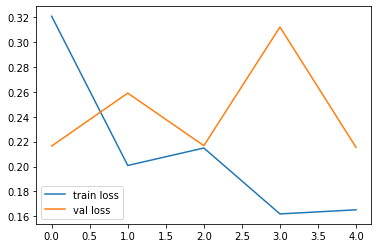

<Figure size 432x288 with 0 Axes>

In [35]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

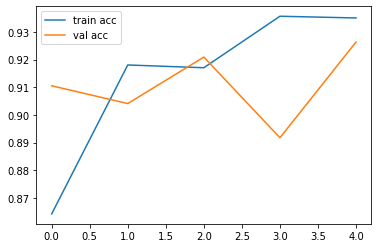

<Figure size 432x288 with 0 Axes>

In [39]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [41]:
r.history

{'loss': [0.32061630487442017,
  0.2008403241634369,
  0.2148658186197281,
  0.16196992993354797,
  0.16526322066783905],
 'accuracy': [0.8642098903656006,
  0.9180512428283691,
  0.9170518517494202,
  0.9356651902198792,
  0.9350405931472778],
 'val_loss': [0.21646757423877716,
  0.258918434381485,
  0.21673913300037384,
  0.3119508922100067,
  0.21538154780864716],
 'val_accuracy': [0.9105288982391357,
  0.9041028022766113,
  0.9209095239639282,
  0.8917449116706848,
  0.926347017288208]}

In [44]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [72]:
img=image.load_img("C:/Users/prakh/Desktop/Cats and dog dataset/test_set/test_set/cats/cat.4081.jpg",target_size= (224,224))

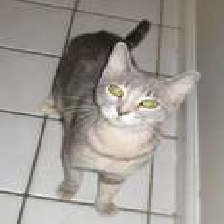

In [73]:
img

In [74]:
x = image.img_to_array(img)

In [75]:
x.shape

(224, 224, 3)

In [76]:
x

array([[[130., 121., 114.],
        [130., 121., 114.],
        [130., 121., 114.],
        ...,
        [118., 111.,  95.],
        [118., 111.,  95.],
        [118., 111.,  95.]],

       [[129., 120., 113.],
        [129., 120., 113.],
        [130., 121., 114.],
        ...,
        [118., 111.,  95.],
        [118., 111.,  95.],
        [118., 111.,  95.]],

       [[129., 120., 113.],
        [129., 120., 113.],
        [130., 121., 114.],
        ...,
        [118., 111.,  95.],
        [118., 111.,  95.],
        [118., 111.,  95.]],

       ...,

       [[202., 202., 200.],
        [202., 202., 200.],
        [202., 202., 200.],
        ...,
        [169., 165., 156.],
        [170., 166., 157.],
        [170., 166., 157.]],

       [[202., 202., 200.],
        [202., 202., 200.],
        [202., 202., 200.],
        ...,
        [169., 165., 156.],
        [170., 166., 157.],
        [170., 166., 157.]],

       [[202., 202., 200.],
        [202., 202., 200.],
        [202., 2

In [77]:
test_image= image.img_to_array(img)
test_image = test_image/255
test_image =np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [78]:
test_image.shape

(1, 224, 224, 3)

In [79]:
result      # Because of softmax we are getting this 2 probabilities, if we use sigmoid we get only 1 probability 

array([[0.9542208 , 0.04577927]], dtype=float32)

In [90]:
a = np.argmax(model.predict(test_image))

In [91]:
a

0

In [92]:
if a==0:
    print("The image classified is cat.")
else:
    print("The image classified is dog.")

The image classified is cat.
